<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_util.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install segyio

     |████████████████████████████████| 92kB 3.5MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

In [6]:
import segyio

with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = segyio.tools.cube(f)
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250


'The 99th percentile is 6517; the max amplitude is 32767'

Import `seis_util` library

In [7]:
!git clone https://github.com/yohanesnuwara/computational-geophysics

Cloning into 'computational-geophysics'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 169 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (169/169), 17.62 MiB | 11.16 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [0]:
import sys
sys.path.append('/content/computational-geophysics/seismic')

In [0]:
from seis_util import *

In [10]:
help(slicing)

Help on function slicing in module seis_util:

slicing(cube, type, loc, a_line)
    Slicing a seismic cube to inline section, crossline section, or timeslice section
    
    Input:
    
    cube: 3d numpy array, data (output of segyio read)
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    loc: the location of inline, crossline, or timeslice depends on the type
         you're choosing (integer/float)
    a_line: array of inline, crossline, and timeslice locations, depends on the 
            type you're choosing (1D numpy array)



In [11]:
help(display_slice)

Help on function display_slice in module seis_util:

display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)
    Display the slice
    
    Input:
    
    slices: the slice data, 2D numpy array
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, vmax = +percentile99, percentiles of the cube



In [10]:
print(inlines[:10])
print(crosslines[:10])
print(twt[:10])

[100 101 102 103 104 105 106 107 108 109]
[300 301 302 303 304 305 306 307 308 309]
[ 4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]


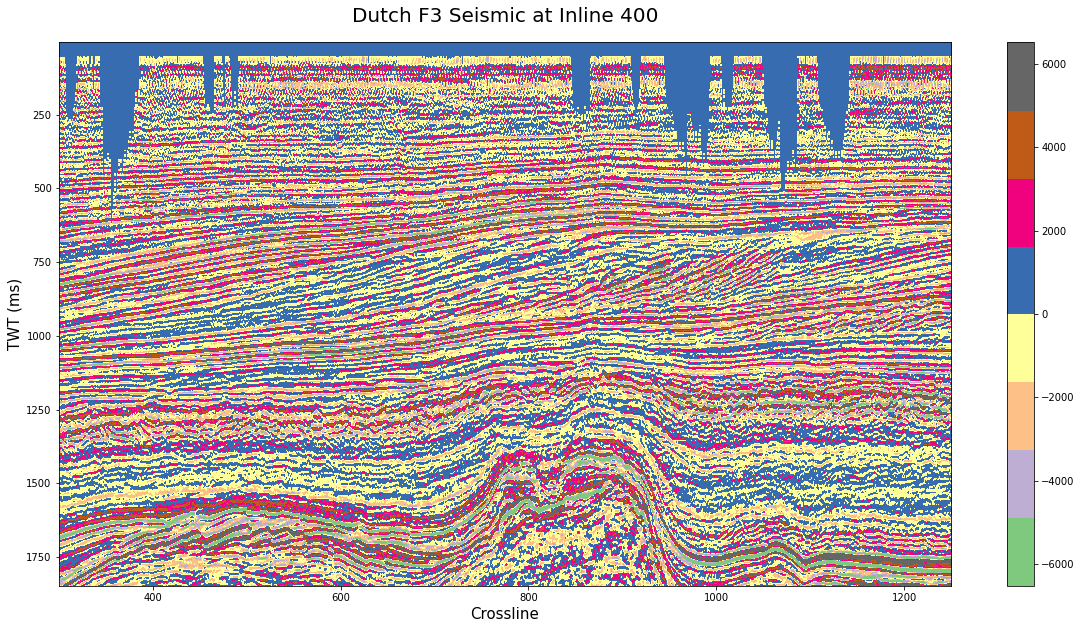

In [12]:
inline_number = 400

slices = slicing(data, 'il', inline_number, inlines)

plt.figure(figsize=(20,10))
display_slice(slices, 'il', crosslines, twt, 'Accent', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Inline {}'.format(inline_number), size=20, pad=20)
plt.xlabel('Crossline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

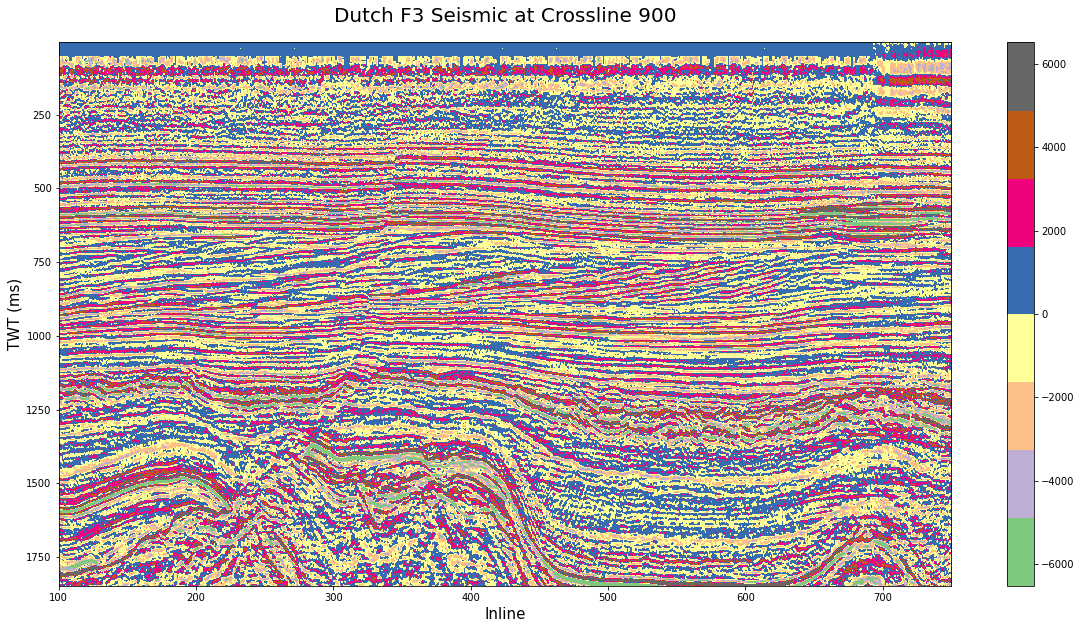

In [13]:
xline_number = 900

slices = slicing(data, 'xl', xline_number, crosslines)

plt.figure(figsize=(20,10))
display_slice(slices, 'xl', inlines, twt, 'Accent', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Crossline {}'.format(xline_number), size=20, pad=20)
plt.xlabel('Inline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

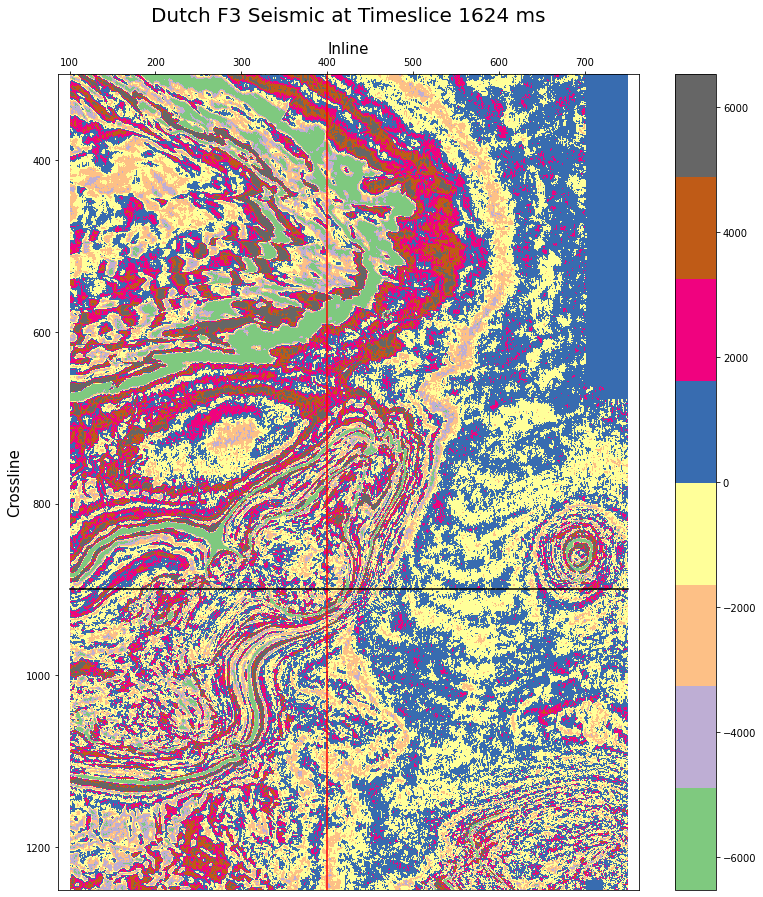

In [14]:
timeslice = 1624 # ms

slices = slicing(data, 'ts', timeslice, twt)

slices.shape

plt.figure(figsize=(13,15))
display_slice(slices, 'ts', inlines, crosslines, 'Accent', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Timeslice {} ms'.format(timeslice), size=20, pad=20)
plt.plot([inline_number, inline_number], [min(crosslines), max(crosslines)], color='red')
plt.plot([min(inlines), max(inlines)], [xline_number, xline_number], color='black')
plt.xlabel('Inline', size=15); plt.ylabel('Crossline', size=15)
plt.gca().xaxis.set_ticks_position('top') # axis on top
plt.gca().xaxis.set_label_position('top') # label on top
plt.axis('equal')
plt.show()